In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [147]:
import os
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

In [149]:
#데이터 불러오기
mental_df = pd.read_csv("Mental Health Dataset.v2.csv")
mental_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No response,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,No response,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,No response,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### 가설1: 정신 질환 치료 이력이 없는 응답자가 많은 국가일수록 정신 질환 치료 인프라 구축 정도가 낮을 것이다.

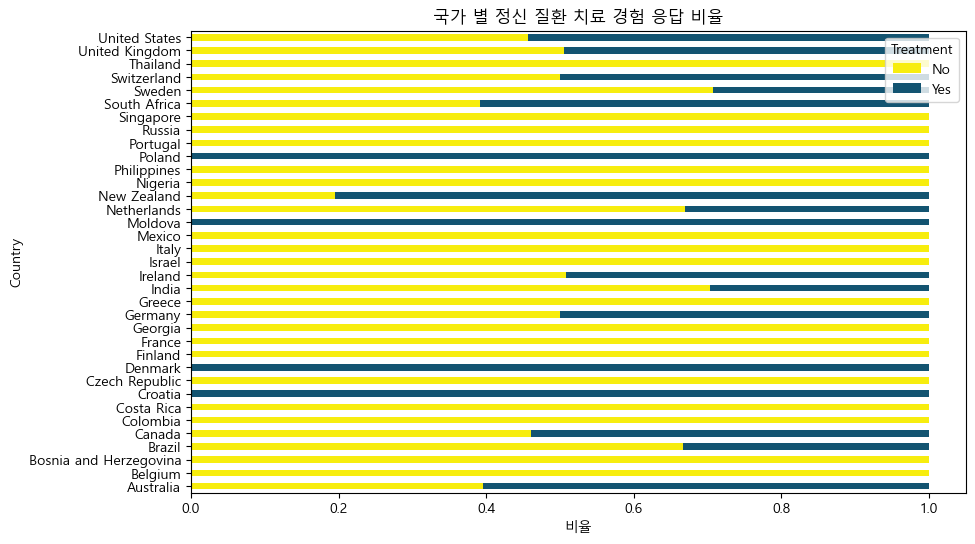

In [151]:
# 나라별 'Yes'와 'No' 답변 수 계산
treatment_counts = mental_df.groupby(['Country', 'treatment']).size().unstack(fill_value=0)

# 비율 계산
treatment_ratios = treatment_counts.div(treatment_counts.sum(axis=1), axis=0)

# 가로 누적 막대 그래프 그리기
treatment_ratios.plot(kind='barh', stacked=True, color=['#F7ED0E', '#135471'], figsize=(10, 6))

# 그래프 제목 및 레이블 설정
plt.title('국가 별 정신 질환 치료 경험 응답 비율')
plt.xlabel('비율')
plt.ylabel('Country')
plt.legend(title='Treatment', loc='upper right')

# 그래프 출력
plt.show()

yes가 100%: 폴란드, 몰도바, 덴마크, 크로아티아
no가 100%: 태국, 싱가포르, 러시아, 포르투갈, 필리핀, 나이지리아, 멕시코, 이탈리아, 이스라엘, 그리스, 조지아, 프랑스, 핀란드, 체코, 코스타리카, 콜롬비아, 보스니아 헤르체고비나, 벨기에

### 가설2: 정신 질환 치료 이력이 있는 사람들이 care_options에 대한 이해도가 더 높을 것이다.

In [153]:
# treatment와 care_options의 분포 확인
treatment_care_options = pd.crosstab(mental_df['treatment'], mental_df['care_options'])

print(treatment_care_options)

care_options     No  Not sure    Yes
treatment                           
No            70338     47158  27262
Yes           48548     30608  68450


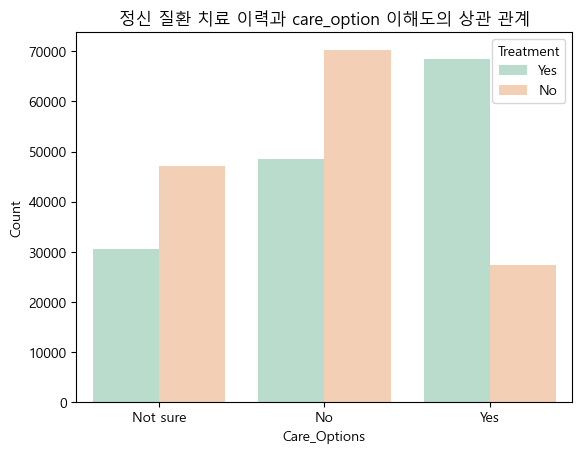

In [155]:
# 시각화
sns.countplot(x='care_options', hue='treatment', palette='Pastel2', data=mental_df)
plt.title('정신 질환 치료 이력과 care_option 이해도의 상관 관계')
plt.xlabel('Care_Options')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()

### 가설3: 스트레스가 높은 사람은 감정 기복을 느끼는 정도가 높고 생활 습관 변화에 대한 의지가 낮을 것이다.

In [159]:
# Mood_Swings를 수치형으로 변환
mood_mapping = {'high': 3, 'medium': 2, 'low': 1}
mental_df['Mood_Swings_Num'] = mental_df['Mood_Swings'].map(mood_mapping)

# Pivot table 생성
pivot_table = mental_df.pivot_table(values='Mood_Swings_Num', 
                                    index='Growing_Stress', 
                                    columns='Coping_Struggles', 
                                    aggfunc='mean').reset_index()

print(pivot_table)

Empty DataFrame
Columns: [Growing_Stress]
Index: []


In [161]:
# Mood_Swings를 수치형으로 변환
mood_mapping = {'high': 3, 'medium': 2, 'low': 1}
mental_df['Mood_Swings_Num'] = mental_df['Mood_Swings'].map(mood_mapping)

# Growing_Stress별 Mood_Swings의 평균값 계산
mean_mood_swings = mental_df.groupby('Growing_Stress')['Mood_Swings_Num'].mean().reset_index()
print(mean_mood_swings)

  Growing_Stress  Mood_Swings_Num
0          Maybe              NaN
1             No              NaN
2            Yes              NaN


Empty DataFrame
Columns: [Growing_Stress, Work_Interest]
Index: []


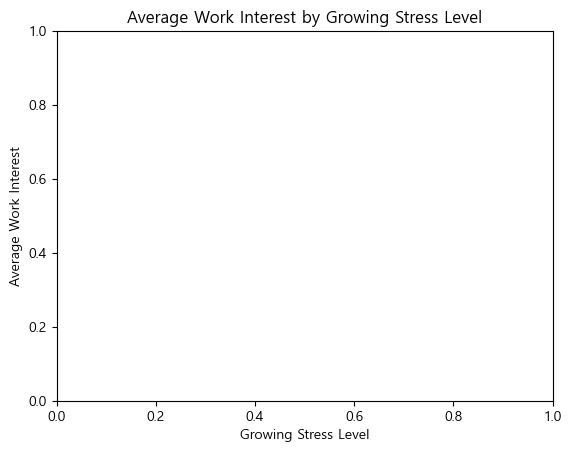

In [135]:
# 범주형 변수를 수치형으로 변환
mapping_dict = {
    'Growing_Stress': {'yes': 2, 'maybe': 1.5, 'no': 1},
    'Work_Interest': {'yes': 2, 'maybe': 1.5, 'no': 1}
}

# 각 열에 매핑 적용
for col, mapping in mapping_dict.items():
    mental_df[col] = mental_df[col].map(mapping)

# 분석
grouped_data = mental_df.groupby('Growing_Stress')['Work_Interest'].mean().reset_index()

# 결과 출력
print(grouped_data)

# 시각화
sns.barplot(x='Growing_Stress', y='Work_Interest', data=grouped_data)
plt.title('Average Work Interest by Growing Stress Level')
plt.xlabel('Growing Stress Level')
plt.ylabel('Average Work Interest')
plt.show()

In [163]:
# Growing_Stress와 Coping_Struggles의 분포 확인
Growing_Stress_Coping_Struggles = pd.crosstab(mental_df['Growing_Stress'], mental_df['Coping_Struggles'])

print(Growing_Stress_Coping_Struggles)

Coping_Struggles     No    Yes
Growing_Stress                
Maybe             55240  44745
No                46610  46116
Yes               52478  47175


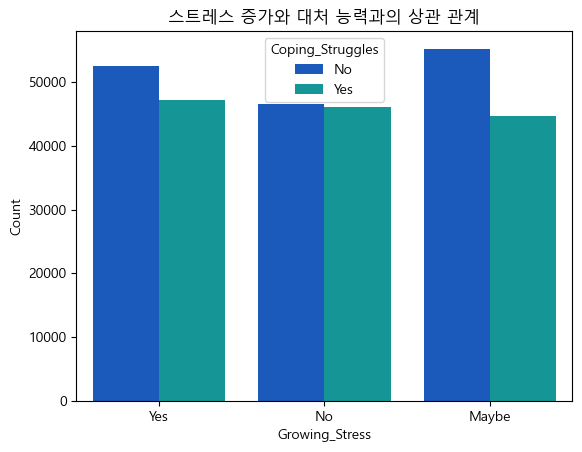

In [169]:
# 시각화
sns.countplot(x='Growing_Stress', hue='Coping_Struggles', palette='winter', data=mental_df)
plt.title('스트레스 증가와 대처 능력과의 상관 관계')
plt.xlabel('Growing_Stress')
plt.ylabel('Count')
plt.legend(title='Coping_Struggles', )
plt.show()

### 가설4: 정신 치료 이력이 없는 사람중에 coping_struggles 에 어려움이 없는 사람일수록 mental_health_interview에서 정신 병력을 충분히 알릴 의향이 있을 것이다.

1. 정신 질환 치료 이력이 없고 스트레스 및 상황 대처에 어려움이 없는 경우

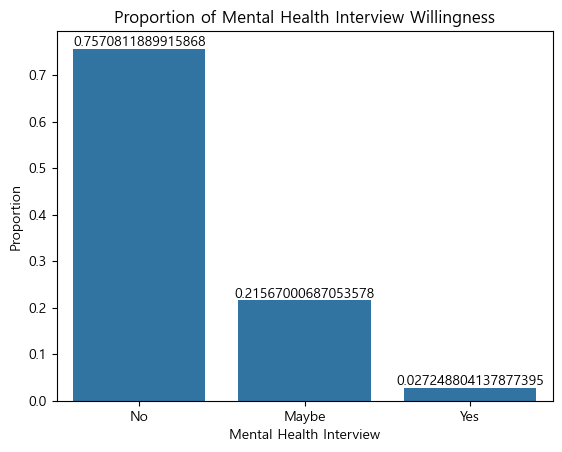

In [191]:
# 정신 치료 이력이 없는 사람 중 Coping_Struggles에 어려움이 없는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'No') & (mental_df['Coping_Struggles'] == 'No')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

2. 정신 질환 치료 이력이 없고 스트레스 및 상황 대처에 어려움이 있는 경우

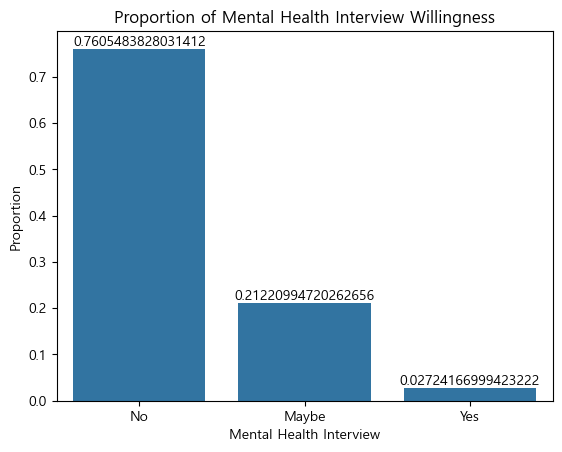

In [205]:
# 정신 치료 이력이 없는 사람 중 Coping_Struggles에 어려움이 있는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'No') & (mental_df['Coping_Struggles'] == 'Yes')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

3. 정신 질환 치료 이력이 있고 스트레스 및 상황 대처에 어려움이 있는 경우

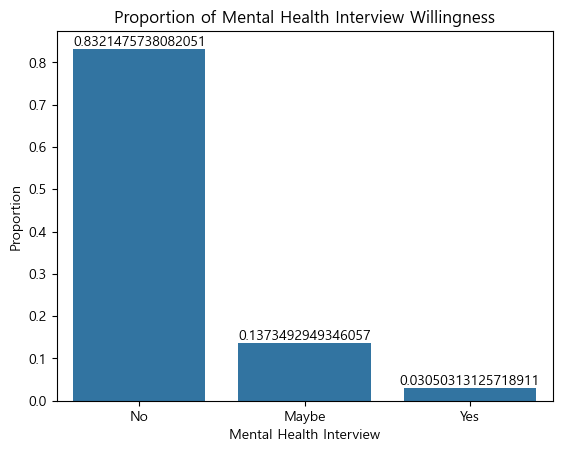

In [196]:
# 정신 치료 이력이 있는 사람 중 Coping_Struggles에 어려움이 있는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'Yes') & (mental_df['Coping_Struggles'] == 'Yes')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

4. 정신 질환 치료 이력이 있고 스트레스 및 상황 대처에 어려움이 없는 경우

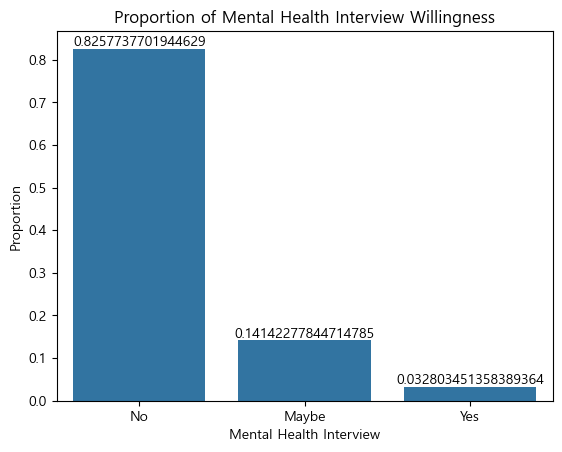

In [202]:
# 정신 치료 이력이 있는 사람 중 Coping_Struggles에 어려움이 없는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'Yes') & (mental_df['Coping_Struggles'] == 'No')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

In [ ]:
# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 그래프 리스트
dfs = [df1, df2, df3, df4]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

# 각 서브플롯에 그래프 그리기
for ax, df, title in zip(axes.flatten(), dfs, titles):
    sns.barplot(x='mental_health_interview', y='proportion', data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Mental Health Interview')
    ax.set_ylabel('Proportion (%)')
    
    # 각 막대 위에 백분율 표시
    for i in ax.patches:
        proportion = i.get_height()
        ax.text(i.get_x() + i.get_width() / 2, proportion, f'{proportion:.1f}%', ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()